#Name:Bandhan Sawant
#sapid:60009220053
#D1-1

#Car Sales EDA

Importing Required Libraries :-

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")


Loading Date-Set :-




In [ ]:
car=pd.read_csv("CAR DETAILS FROM CAR DEKHO (1).csv")
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


Basic Information Regarding Dataset :-

In [ ]:
car.shape

(4340, 8)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Detection Of Missing Values :-

In [ ]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
# checking duplicates :_
len(car[car.duplicated()])

763

Checking Correlation :-

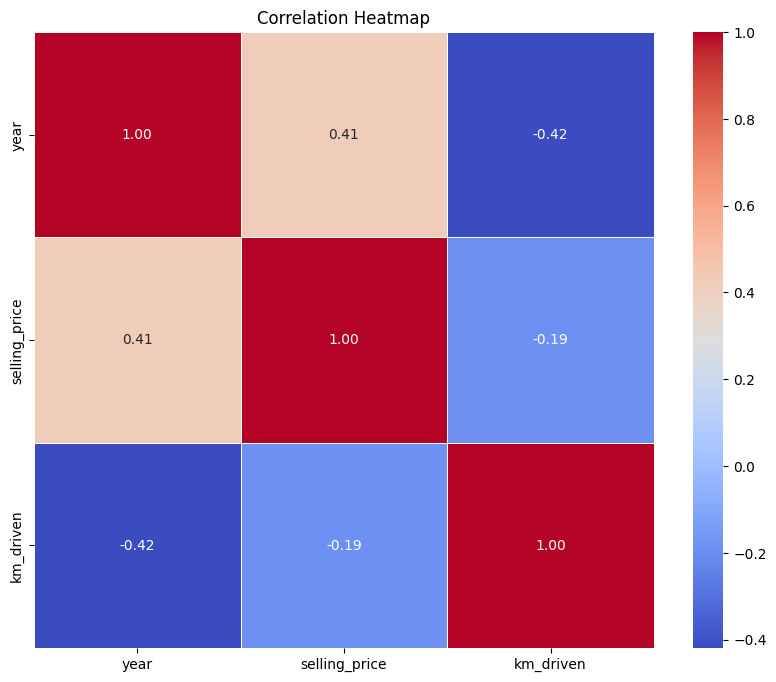

In [ ]:
numeric_car = car.select_dtypes(include=['float64', 'int64'])

# Compute correlation
correlation_matrix = numeric_car.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Checking Outlier in Numerical Columns :-

<Axes: xlabel='selling_price'>

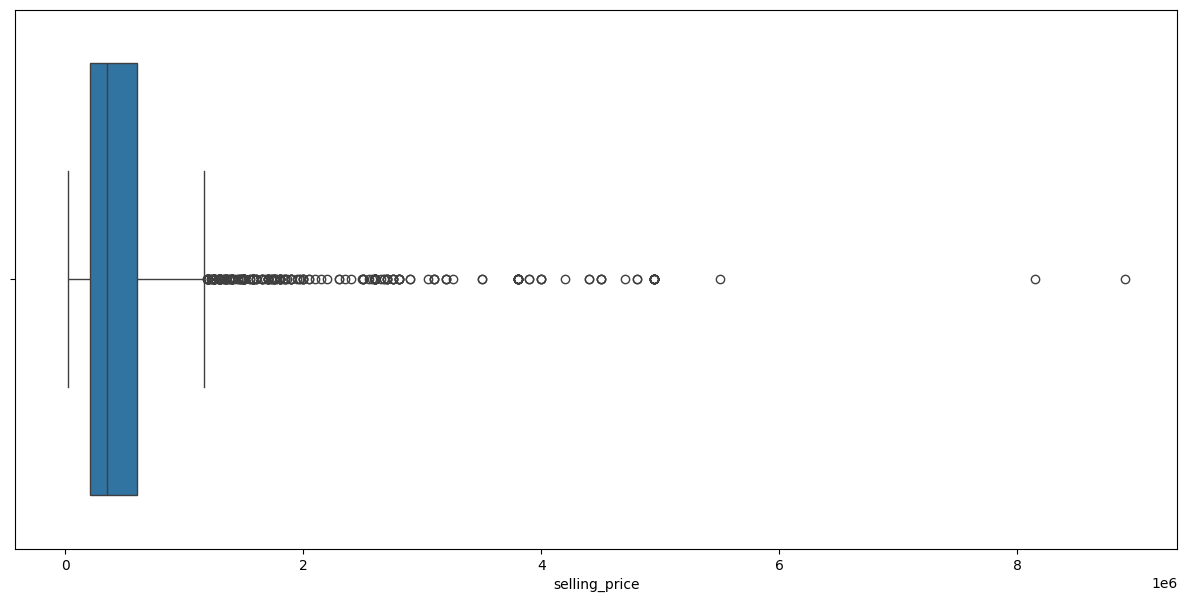

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x=car["selling_price"])

<Axes: xlabel='km_driven'>

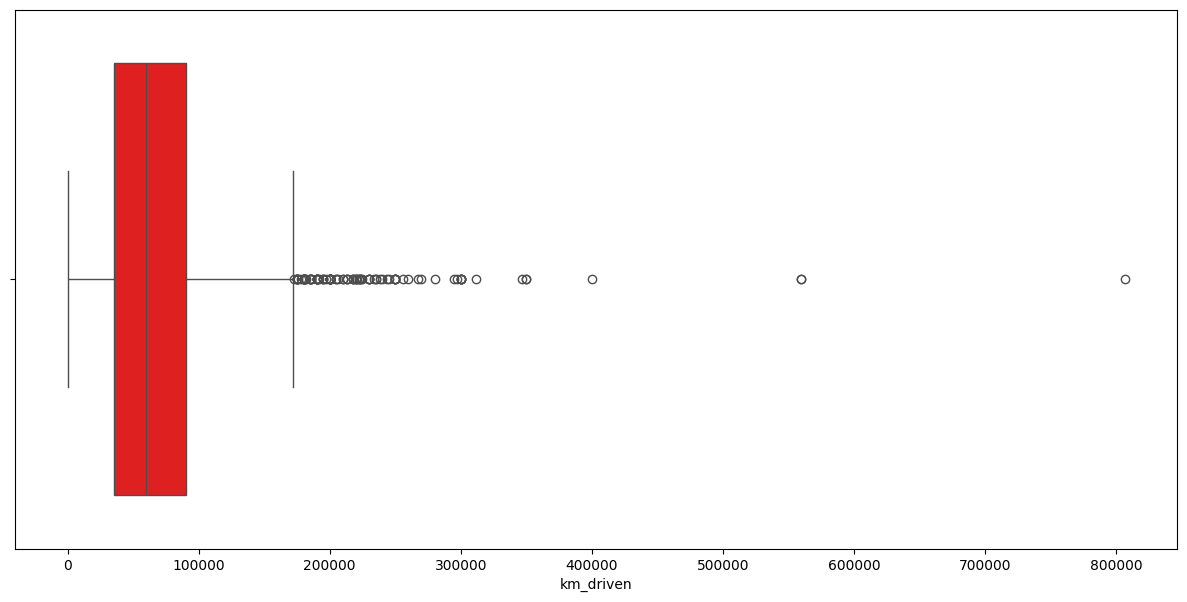

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(x=car["km_driven"],color="Red")

Feature Engneering :- (Fetching Car Names And Car's Age)

In [ ]:
car["Brand_name"]=car["name"].str.split(" ",expand=True)[0]

In [ ]:
car["Brand_name"].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [ ]:
car["Age"]=car["year"].apply(lambda x: 2020-x)
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand_name,Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,6


#Data Insights :-

#Analysis On Categorical Columns :-

In [ ]:
car.select_dtypes(include="object").columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'Brand_name'], dtype='object')

#Which Brands has Maximum and Minimum Cars :-

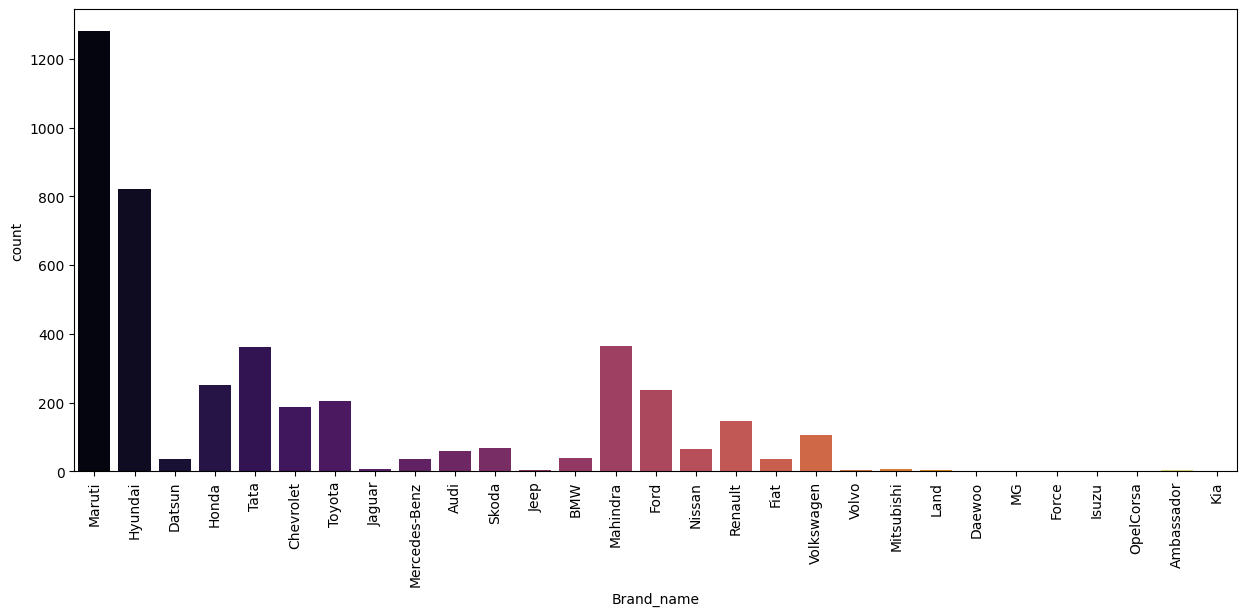

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Brand_name",data=car,palette="inferno")
plt.xticks(rotation=90);

Maruti has Maximum Sales In Second Market And MG,KIA,FORCE,ISUZU,ETC has Minimum sales in Second Car Market.

#Average Sales Of Each Brand in Second Market :-

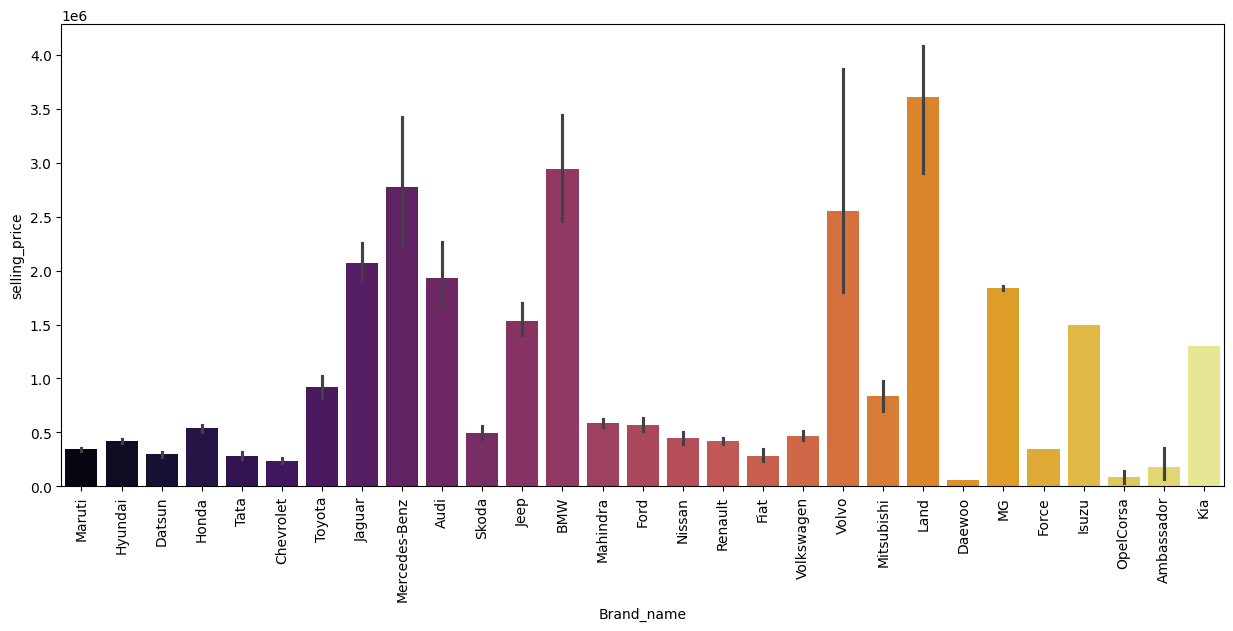

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="Brand_name",y="selling_price",data=car,palette="inferno")
plt.xticks(rotation=90);

Mainly Luxury Car Brands Has Highest Average Selling Price in Sencond-Hand Market .
Land-Rover, Volvo, BMW, Mercedes-Benz, Audi, Jaguar These Brand Categorized in Luxury Brand,So Price Of these Car is also Higher as Compare to Other Mid-Range or Buget Car In Second Market .

#Which Car Brand is Most Sold In Second Hand Market :

In [ ]:
Brand=pd.DataFrame(car["Brand_name"].value_counts())
Brand

,count
Brand_name,
Maruti,1280
Hyundai,821
Mahindra,365
Tata,361
Honda,252
Ford,238
Toyota,206
Chevrolet,188
Renault,146


Maruti and Hyundai Are The Most Popular Car Brand In Second Market.

#Which Fuel Types Car Has More Demand :-

In [ ]:
car["fuel"].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

<Axes: xlabel='fuel', ylabel='count'>

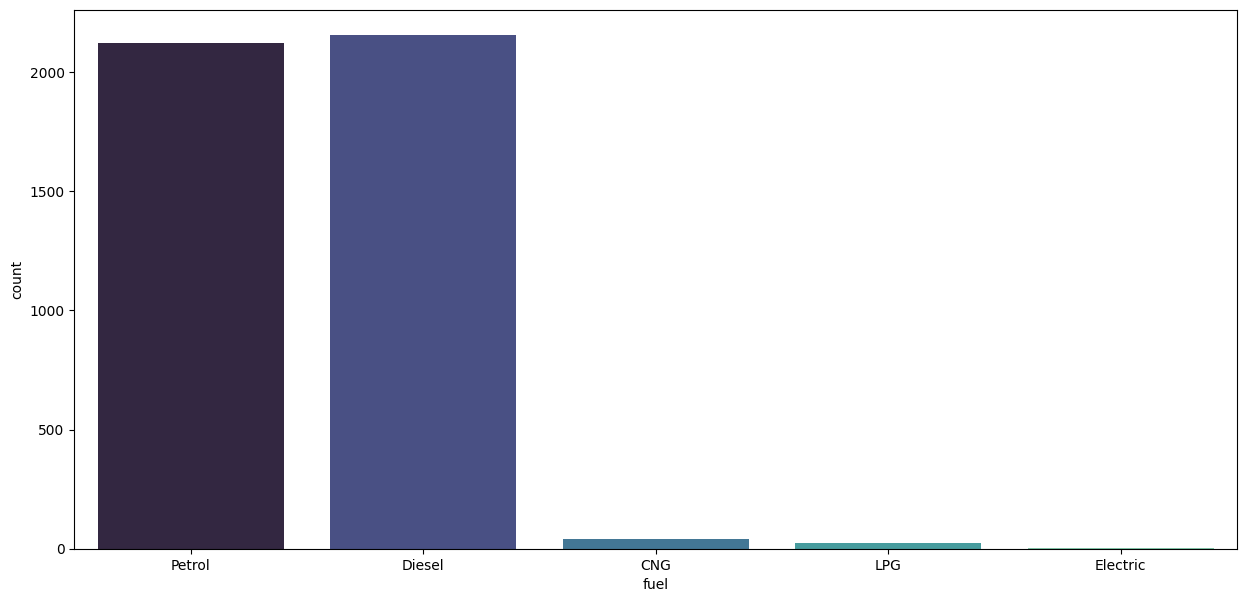

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x=car["fuel"],data=car,palette="mako")

Petrol and Diesel Cars Has More In Demand As Compared To CNG, LPG, Electric Cars.

#Most Popular Seller Type In Second Market :-

In [ ]:
s=car["seller_type"].value_counts()
seller=pd.DataFrame(s)
seller

,count
seller_type,
Individual,3244
Dealer,994
Trustmark Dealer,102


Most Of The Sellers Are Individual People,Dealers,and Then Trustmark Dealers.

#Manual Car Vs Automatic Car :-

In [ ]:
x=car["transmission"].value_counts()
x1=pd.DataFrame(x)
x1

,count
transmission,
Manual,3892
Automatic,448


Manual Cars Has More sold as Compared To Automatic Cars In Second-Hand Car Market.

#First,Second,Third Car Owner Counts:-

In [ ]:
car["owner"].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

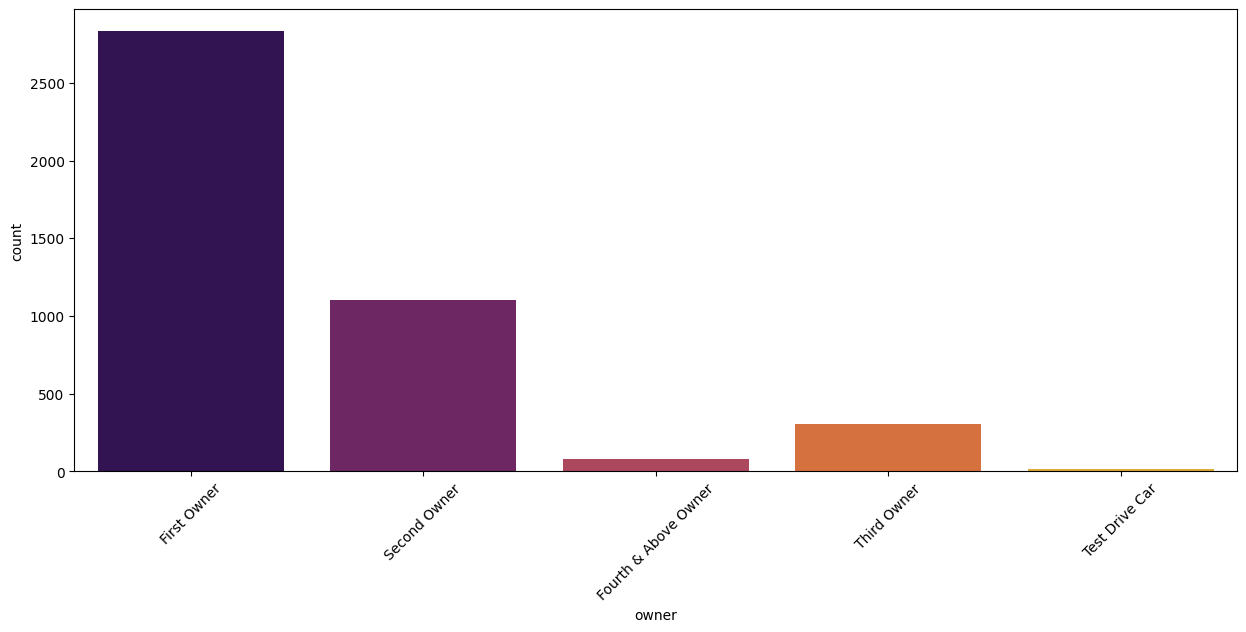

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=car["owner"],data=car,palette="inferno",)
plt.xticks(rotation=45)
plt.show()

First Ower Cars Are Mostly Sold In Second-hand Market as Compared To Second, Thrid, Fourth & Above Owner Cars.

#Year-Wise Trends :-

In [ ]:
car["year"].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

In [ ]:
t=car.groupby(["year"])["name"].count()
trends=pd.DataFrame(t)
trends

,name
year,
1992,1
1995,1
1996,2
1997,3
1998,12
1999,10
2000,12
2001,20
2002,21


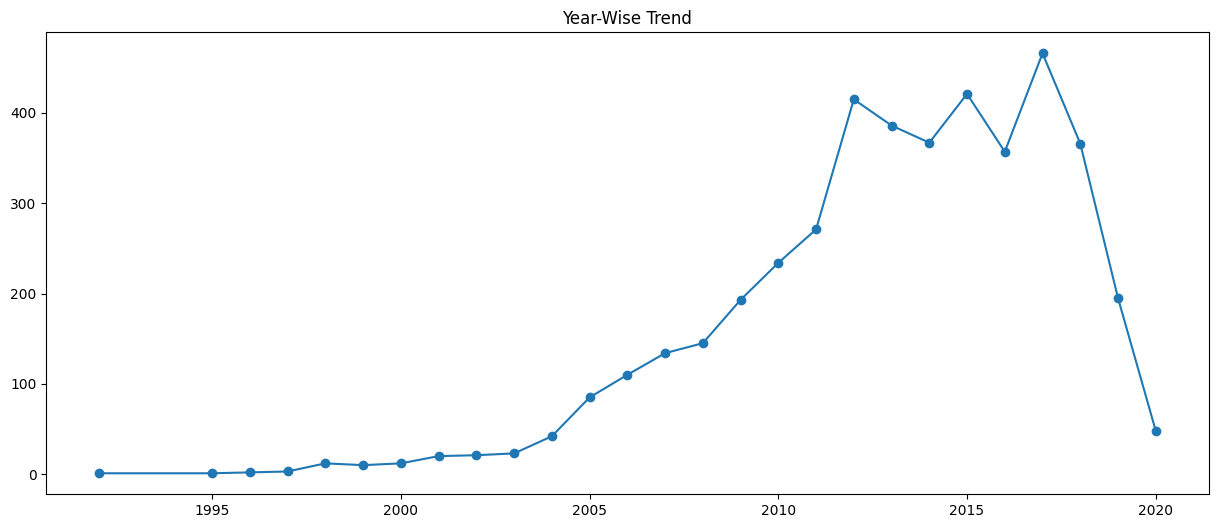

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(trends,marker="o")
plt.title("Year-Wise Trend")
plt.show()

Car (Model) With The Year 2017, 2015, 2012 sold the Most In Second-Hand Market .

#Distribution of Kilometer Driven Car :-

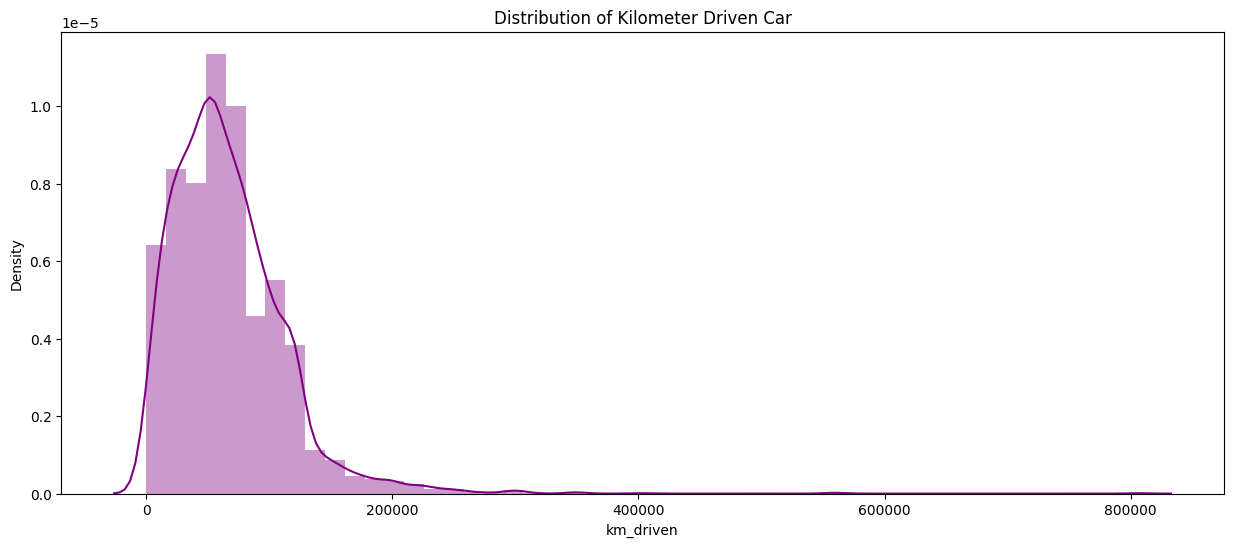

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(car["km_driven"],color="Purple")
plt.title("Distribution of Kilometer Driven Car")
plt.show()

#:Relationship Between Year and Selling Price :-

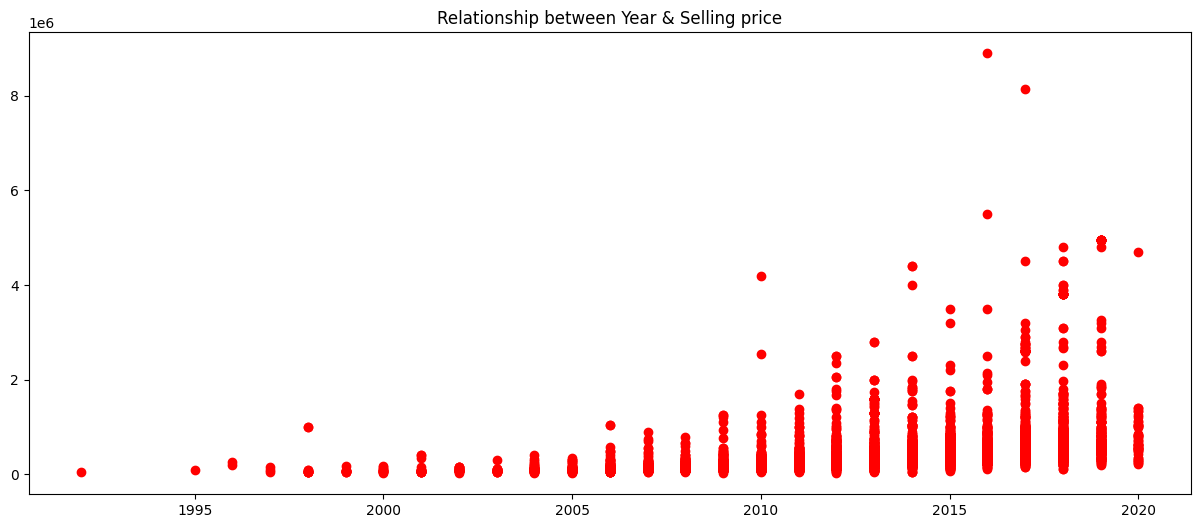

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(car["year"],car["selling_price"],color="r")
plt.title("Relationship between Year & Selling price")
plt.show()

Recently Purchased Car's Has Higher Selling Price In Second Market.

#Relationship between Kilo-meter Driven & Selling price :-

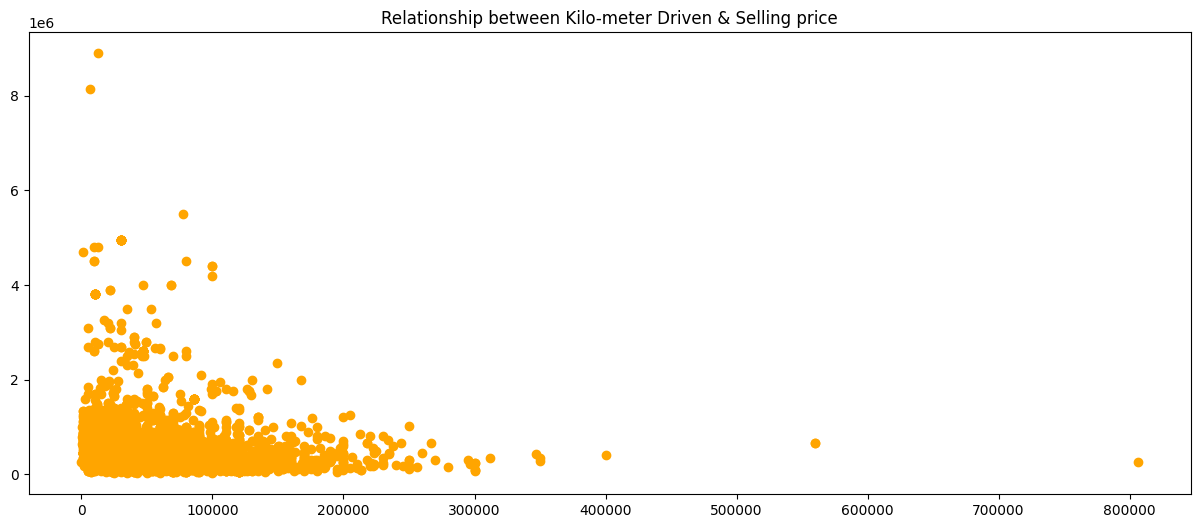

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(car["km_driven"],car["selling_price"],color="orange")
plt.title("Relationship between Kilo-meter Driven & Selling price")
plt.show()

Less Kilo-Meter Driven Car has Higher Price in Market as Compared to High Kilo-Meter Driven Car.

#Relation Between Age and Sellling Price :-

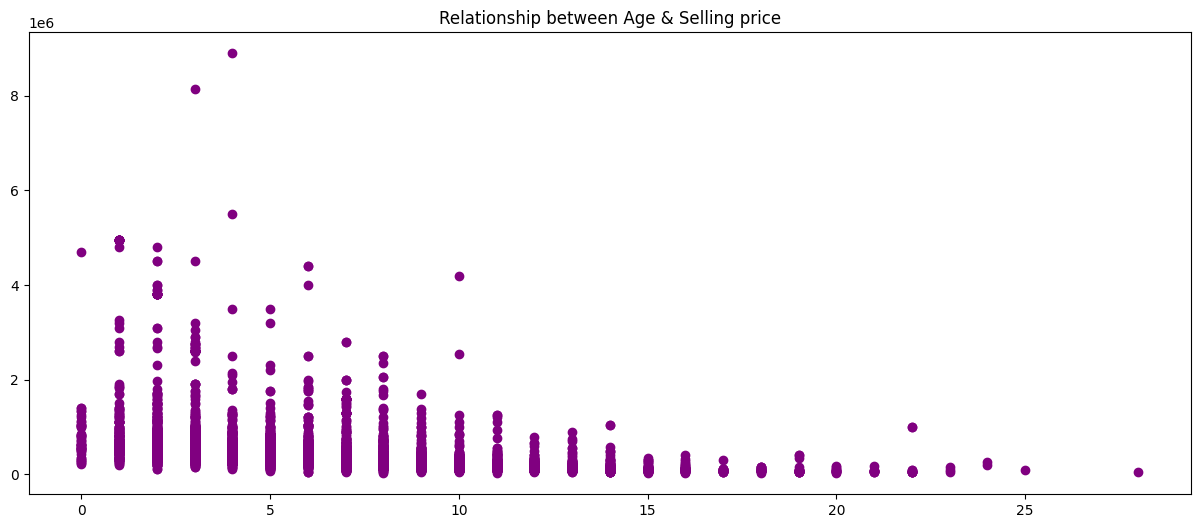

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(car["Age"],car["selling_price"],color="purple")
plt.title("Relationship between Age & Selling price")
plt.show()

Newly Age Car Has Highest Selling Price In Second Hand Market As Compared To Old Age Car's.

#Selling Price Variation With Respect To Owner,Fuel,Transmission :-

Text(0.5, 1.0, 'Selling Price Acc. To Owner Type')

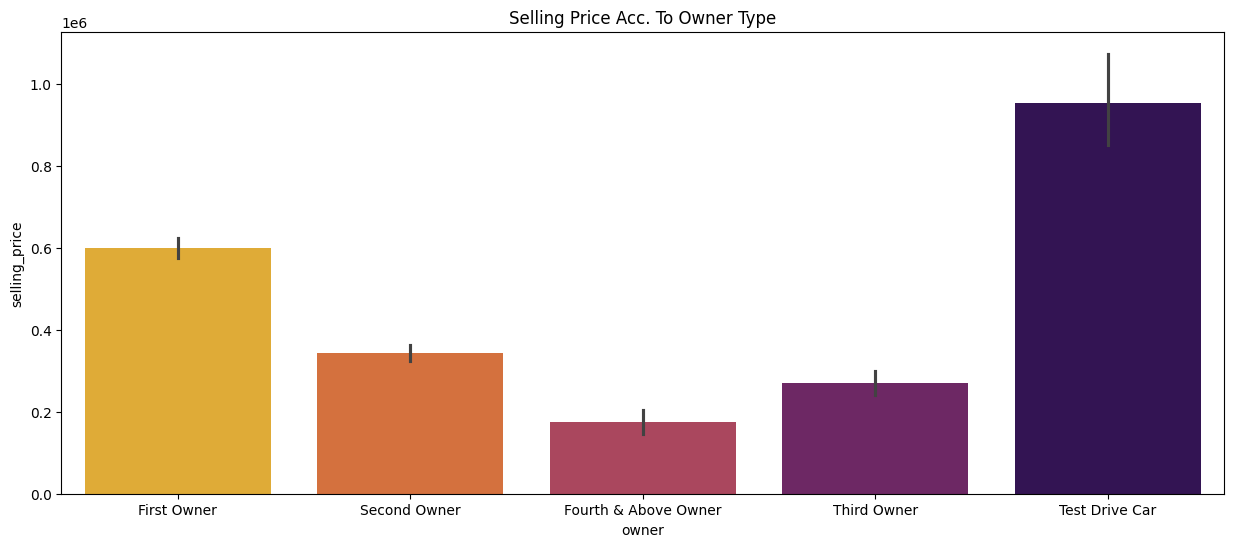

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=car["owner"],y=car["selling_price"],data=car,palette="inferno_r")
plt.title("Selling Price Acc. To Owner Type")

Test Drive Cars Has Highest Selling Price in Second Market as Compared to Others.

#Selling Price Acc. To Fuel Type :

Text(0.5, 1.0, 'Selling Price Acc. To Fuel Type')

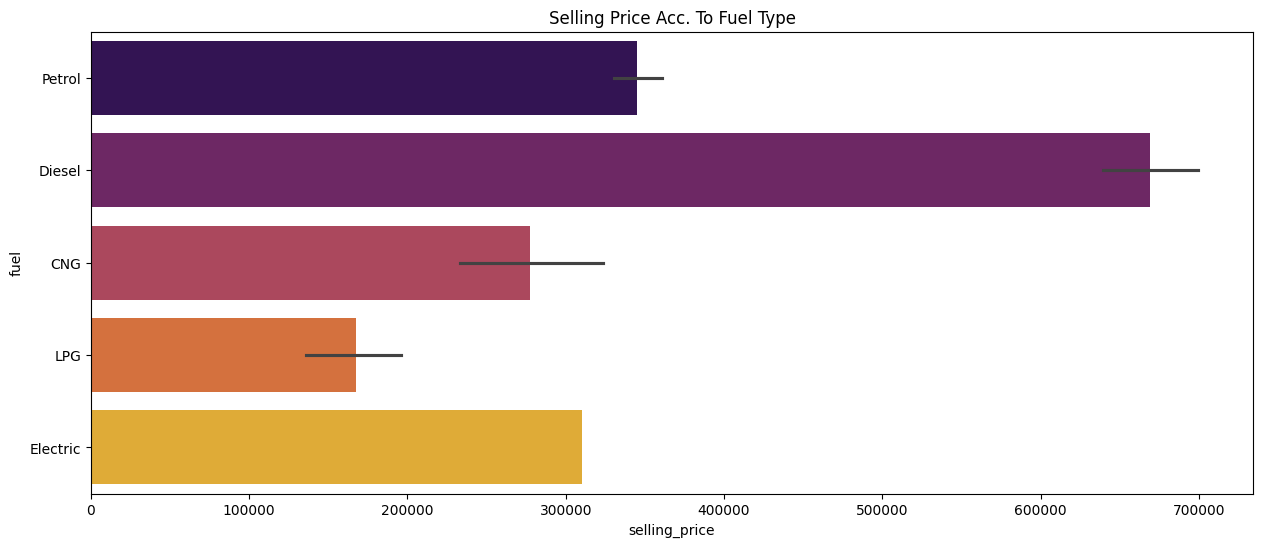

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=car["selling_price"],y=car["fuel"],data=x1,palette="inferno")
plt.title("Selling Price Acc. To Fuel Type")

Diesel Car's Has Highest/Maximum Selling Price in Second-hand Car Market.

#Selling Price Acc. To Transmission Type :-

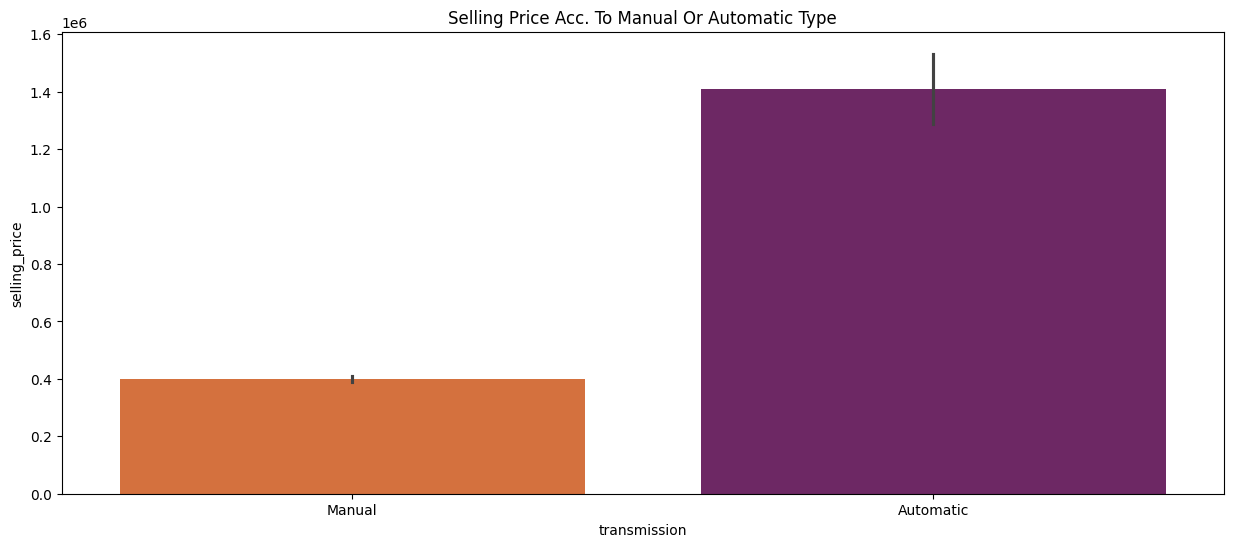

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=car["transmission"],y=car["selling_price"],data=car,palette="inferno_r")
plt.title("Selling Price Acc. To Manual Or Automatic Type")
plt.show()

Automatic Car Has Highest Selling Price As Compared to Manual Car's in Second Market.

#Average Selling Price Acc. To Car's Age :

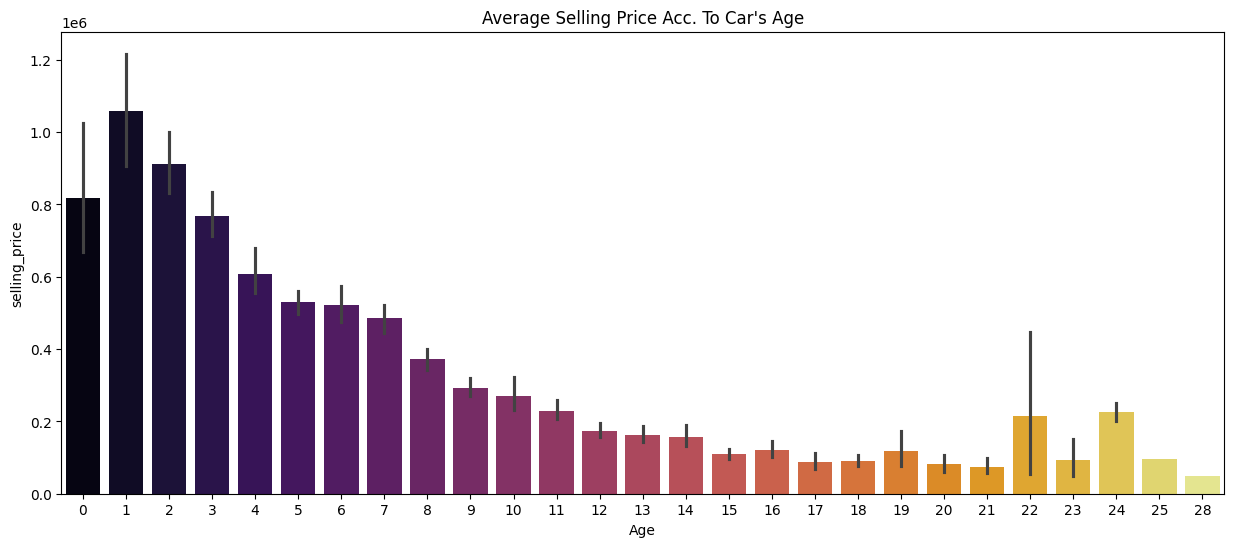

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=car["Age"],y=car["selling_price"],data=car,palette="inferno")
plt.title("Average Selling Price Acc. To Car's Age");

Car With Minimum Age Has The Highest Average Selling Price.
Car Between 0 to 2 year has Highest Selling Price in Second Hand Car Market.

In [ ]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand_name,Age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,6


In [ ]:
pip install lazypredict

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lazypredict.Supervised import LazyRegressor


# Feature Engineering
car['Brand_name'] = car['name'].apply(lambda x: x.split()[0])
car['Age'] = 2024 - car['year']


# Split the data into features (X) and target variable (y)
X = car.drop(['name', 'selling_price'], axis=1)
y = car['selling_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['km_driven', 'Age']
numeric_transformer = StandardScaler()

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'Brand_name']
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define a list of regressor models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

# Evaluate each model
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    accuracy = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Accuracy (R² score):", accuracy)
    print("---------------------------------------------")

# Lazy Predict
lazy_regressor = LazyRegressor(predictions=True)
lazy_regressor.fit(X_train, X_test, y_train, y_test)


Model: Linear Regression
Mean Absolute Error: 184882.14885381857
Mean Squared Error: 143459416507.70526
Root Mean Squared Error: 378760.3681850904
Accuracy (R² score): 0.5299037191715428
---------------------------------------------
Model: Decision Tree
Mean Absolute Error: 127441.71556671057
Mean Squared Error: 109292749681.83607
Root Mean Squared Error: 330594.5397036014
Accuracy (R² score): 0.6418630690290926
---------------------------------------------
Model: Random Forest
Mean Absolute Error: 116450.96248262592
Mean Squared Error: 80707043803.47328
Root Mean Squared Error: 284089.85163759947
Accuracy (R² score): 0.7355343967495198
---------------------------------------------
Model: Gradient Boosting
Mean Absolute Error: 145197.40748505143
Mean Squared Error: 94311889187.772
Root Mean Squared Error: 307102.408306695
Accuracy (R² score): 0.6909532366409986
---------------------------------------------


100%|██████████| 42/42 [00:34<00:00,  1.21it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 3472, number of used features: 16
[LightGBM] [Info] Start training from score 507767.468318


(Empty DataFrame
 Columns: [Adjusted R-Squared, R-Squared, RMSE, Time Taken]
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [])

#Random Forest model stands out as the best performer with the lowest mean squared error and highest accuracy (R² score), indicating its effectiveness in predicting car prices based on the given features.
#Gradient Boosting also shows promising performance but falls slightly behind Random Forest.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the mean squared error of the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of the best model:", mse)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found by GridSearchCV:
{'regressor__max_depth': None, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Mean Squared Error of the best model: 88329258444.61264


### Conclusion:

GridSearchCV exhaustively searched through 243 different combinations of hyperparameters for the RandomForestRegressor model. After this thorough search, the best combination of hyperparameters was identified:
1) max_depth: None,  
2) max_features: 'log2',  
3) min_samples_leaf: 1,  
4) min_samples_split: 2,  
5) n_estimators: 200  

This optimized model, when applied to the test set, resulted in a mean squared error of approximately 89,093,229,732.69. This signifies an improvement in predictive accuracy compared to the default RandomForestRegressor model.

In [ ]:
import joblib

# Save the best model for future use
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [ ]:
from joblib import load

# Load the trained pipeline
pipeline = load('best_model.pkl')

# Now you can use it for predictions as shown previously


In [ ]:
import pandas as pd

# Assuming 'pipeline' is your trained scikit-learn pipeline
# Create a DataFrame for prediction with the correct structure
input_data = pd.DataFrame({
    'name': ['Maruti 800 AC'],  # Ensuring it's a list
    'year': [2007],            # Example year
    'km_driven': [50000],      # Example kilometers
    'fuel': ['Petrol'],
    'seller_type': ['Individual'],  # Example seller type
    'transmission': ['Manual'],
    'owner': ['First Owner'],  # Example owner type
    'Brand_name': ['Maruti'],  # Example brand
    'Age': [13]                # Example age
})

# Make a prediction using the pipeline
predicted_price = pipeline.predict(input_data)

print("Predicted Selling Price:", predicted_price)


Predicted Selling Price: [189267.01755952]




The best model obtained from GridSearchCV was saved as 'best_model.pkl' using joblib, ensuring easy access and deployment for future predictions.